## Important Note

1. In the visualisation section I  forgot to change the labels(now i have done it) but the graphs shows the old labels so please consider                                                                                                              `Blue as Average` `Orange as Max` and `Green as Min`

In [43]:
import gym
import numpy as np

In [44]:
env = gym.make('MountainCar-v0')
env.reset()

observation_space_size = [20] * len(env.observation_space.high)
observation_space_window_size = (env.observation_space.high - env.observation_space.low) / observation_space_size
Q_Table = np.random.uniform(low=-2,high=0,size =(observation_space_size + [env.action_space.n]))

### Function to convert Continuous states to discrete states

In [4]:
def disc_states(state):
    discrete_state = (state - env.observation_space.low)/observation_space_window_size
    return tuple(discrete_state.astype(int))

In [5]:
discrete_state = disc_states(env.reset())
print(discrete_state)

(7, 10)


### HyperParameters


In [53]:
#Learning Rate here = alpha
alpha = 0.1
#discount is basically like weight which tells us how much important are the future actions/ new rewards vs old reward
discount = 0.95
episodes = 20000
SHOW_EVERY = 5000

# Epsilon Declaration and settings
epsilon = 1  
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = episodes//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

### Data Visualization

#### 1. First we have to create lists which can be used to hold data

1. Then we have to iterate and append the reward list(append it with reward from episode)
2. Here to reduce the complexity and size of the lists we will not append the list for every episode but only take samples at regular intervals lets say after every 100 episode we'll append the list.
3. We can find various attributes like max min avg and create their lists as well.
4. Finally we'll plot these lists wrt to episodes.

In [50]:
rewards = []
# For all the attributes either we can create individual lists or a dictionary
episode_rewards_all = {'ep':[],'ep_avg':[],'ep_max':[],'ep_min':[]}

## Now we will use them in our main code so that we can get the required lists

In [51]:
env = gym.make('MountainCar-v0')
env.reset()
#is_alive is used just to check if the environment is still working or it has stopped responding can be skipped as well
is_alive = 200

for episode in range(episodes):
    
    
    ##Reward variable(used to find reward and append to the list)
    reward_per_episode = 0
    
    
    
    discrete_state = disc_states(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:
    #if used for getting a random action from Q_Table Exploration purpose
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(Q_Table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        
        
####Here we will add the previously acquired reward to to reward before appending
        reward_per_episode += reward
        
        
        
        new_discrete_state = disc_states(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        
        #if the simulation didn't ended after the last step update the Q-Table using the Q-Function
        if not done:
            
            #Finding the max Q_Val (estimate of optimal future value)
            max_future_q_val = np.max(Q_Table[new_discrete_state])
            
            current_q_val    = Q_Table[discrete_state + (action, )]
            
            #Q-Function
            new_q_val = (1-alpha) * current_q_val + alpha * (reward + discount * max_future_q_val)
            
            #Updating Q_Table
            Q_Table[discrete_state+(action, )] = new_q_val
        
        #If the simulation is ended(goal state reached can be a reason) then update the Q-Table with the reward i.e., 0
        elif new_state[0] >= env.goal_position:
            
            #print(f"Goal state reached: {episode}")
            Q_Table[discrete_state+(action, )] = 0
        discrete_state = new_discrete_state
    #Epsilon Decay 
    if END_EPSILON_DECAYING >= episode and episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
        
    #Appending rewards
    rewards.append(reward_per_episode)
    
    #Populating our dictionary
    if episode%SHOW_EVERY==0:
        average_reward = sum(rewards[-SHOW_EVERY:])/SHOW_EVERY
        episode_rewards_all['ep'].append(episode)
        episode_rewards_all['ep_avg'].append(average_reward)
        episode_rewards_all['ep_max'].append(max(rewards[-SHOW_EVERY:]))
        episode_rewards_all['ep_min'].append(min(rewards[-SHOW_EVERY:]))
        
        
env.close()

0
5000
10000
15000


## Visualisation part


In [9]:
import matplotlib.pyplot as plt

`episodes =20,000` ` epsilon_decaying = episodes//2`

<function matplotlib.pyplot.show(close=None, block=None)>

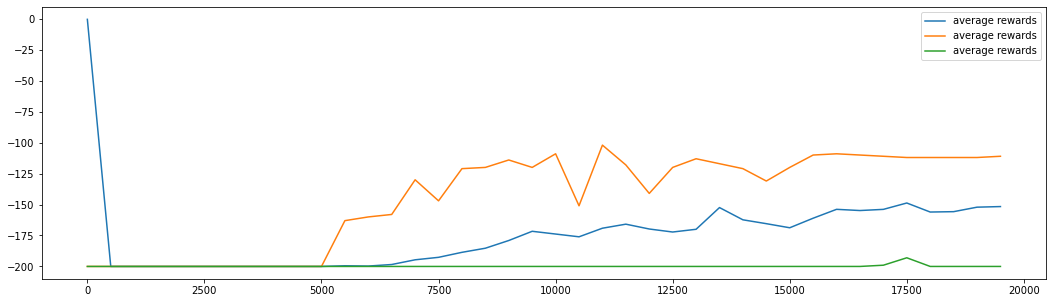

In [10]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="Max rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="Min rewards")
plt.legend(loc=1
plt.show

### Let's start tweaking our HyperParameters lets reduce the episodes and change the epsilon decay policy 
` END_EPSILON_DECAYING = episodes `
` episodes  = 5000`
`show_every = 100`

<function matplotlib.pyplot.show(close=None, block=None)>

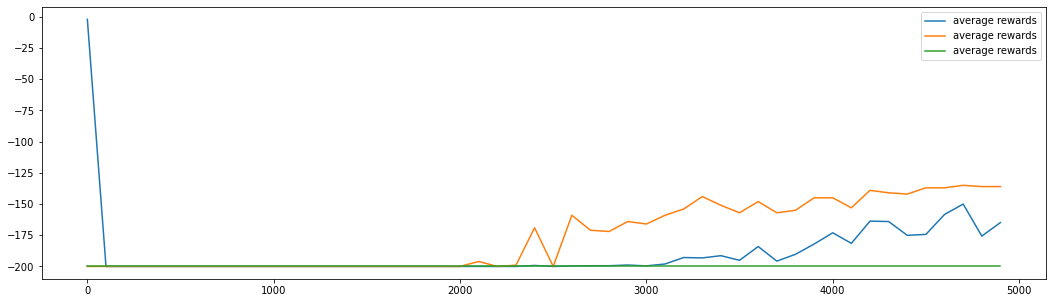

In [15]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="max rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="min rewards")
plt.legend(loc=1)
plt.show

### Lets keep the episodes same but change the epsilon policy 
` END_EPSILON_DECAYING = episodes//2`

<function matplotlib.pyplot.show(close=None, block=None)>

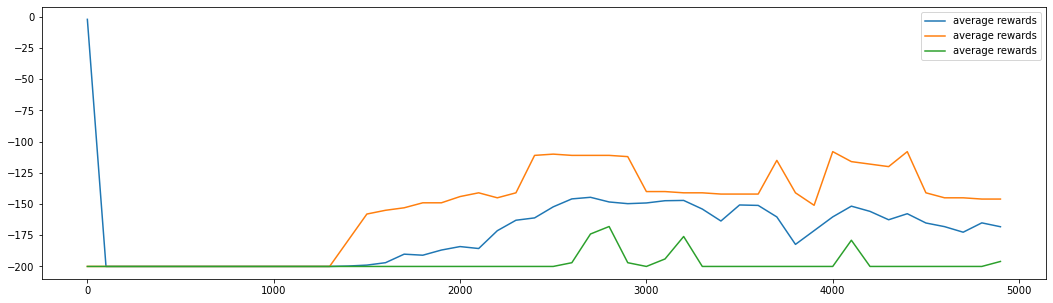

In [19]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="average rewards")
plt.legend(loc=1)
plt.show

1. This looks like a better overall graph and when we increase the episodes it seems like the reward will go up(already seen in the first graph :P)

#### Similarly we can change the size of Q_Table
` observation_space_size = [40] * len(env.observation_space.high)`                                                         
`size = 40x40 now`                                                                                                         ` episodes =25,000`

<function matplotlib.pyplot.show(close=None, block=None)>

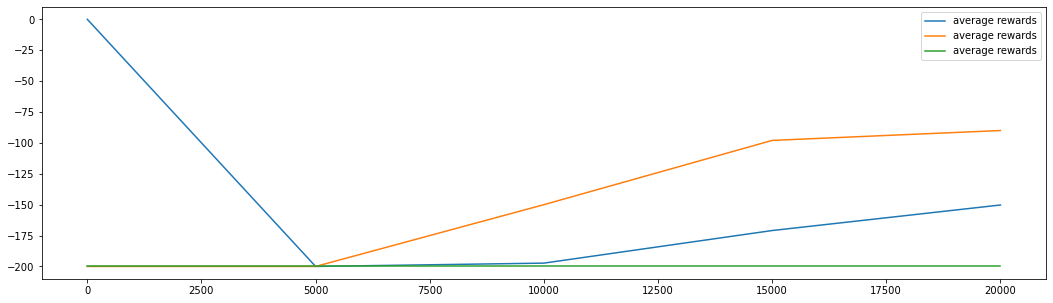

In [35]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="max rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="min rewards")
plt.legend(loc=1)
plt.show

#### Let's change the discount from 0.95 to 0.5 
` episodes = 20,000`

<function matplotlib.pyplot.show(close=None, block=None)>

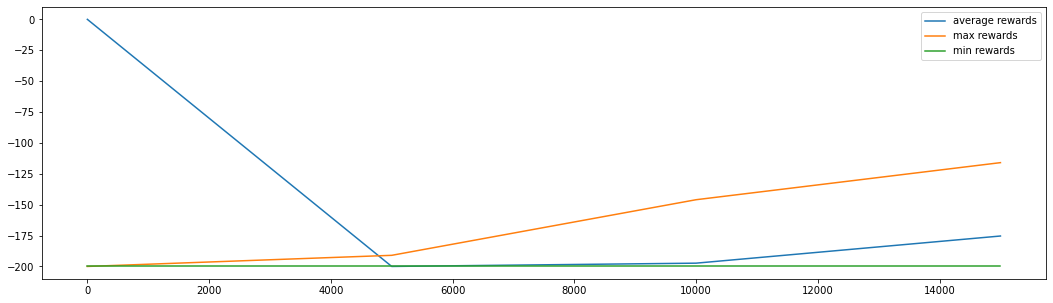

In [42]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="max rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="min rewards")
plt.legend(loc=1)
plt.show

Note: Decreseasing the discount decreases the exploaration performed by the agent hence linear graphs

### Lets change alpha to 0.5 


<function matplotlib.pyplot.show(close=None, block=None)>

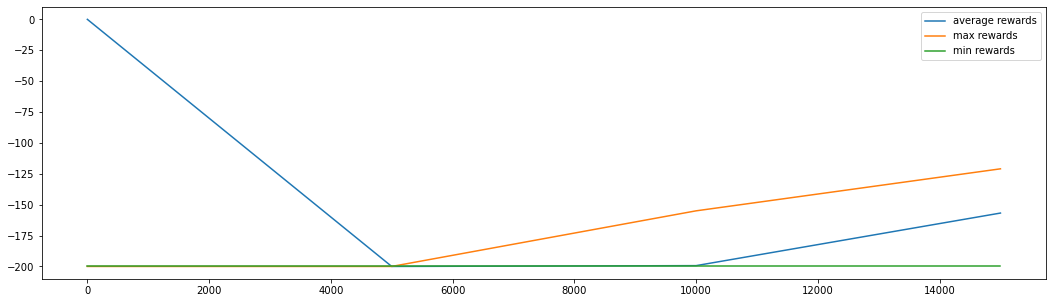

In [48]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="max rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="min rewards")
plt.legend(loc=1)
plt.show

` alpha = 0.9` `discount = 0.1`

<function matplotlib.pyplot.show(close=None, block=None)>

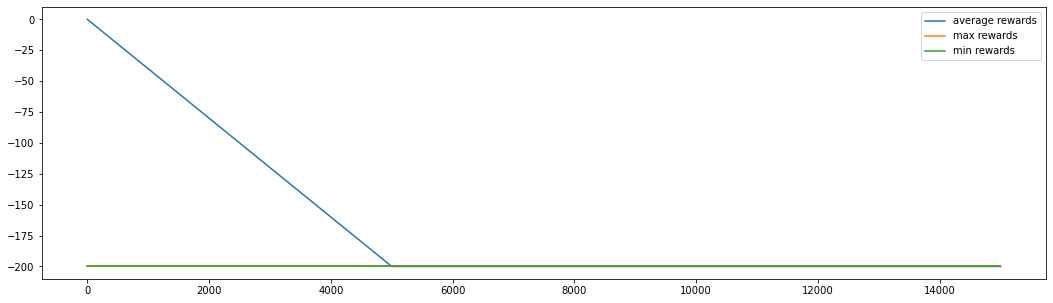

In [52]:
plt.figure(figsize=(18,5))
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_avg'], label="average rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_max'], label="max rewards")
plt.plot(episode_rewards_all['ep'], episode_rewards_all['ep_min'], label="min rewards")
plt.legend(loc=1)
plt.show